In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [4]:
len(y)

NameError: name 'y' is not defined

In [3]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    tx_transposed = np.transpose(tx)
    w = np.linalg.solve(np.dot(tx_transposed, tx), np.dot(tx_transposed, y))
    e = compute_loss(y, tx, w)
    mse = np.dot(np.transpose(e), e)/(2*len(y))
    return w, mse
    
    # ***************************************************
    raise NotImplementedError

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [27]:
len(tx)

NameError: name 'tx' is not defined

In [4]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    e = np.zeros(len(y))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    
    #Loop on dimensions
    for i in range (len(w0)):
        #Loop on parameters
        for j in range (len(w1)):
            w = [w0[i], w1[j]]
            e = compute_loss(y, tx, w)
            losses[i, j] = np.dot(np.transpose(e), e)/(2*len(y))
    return w, losses
    # ***************************************************
    raise NotImplementedError

In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    #e = y - tx*w
    e = y - np.dot(tx, w)
    return e
    
    # ***************************************************
    raise NotImplementedError

In [6]:
from helpers import *
from grid_search import generate_w, get_best_parameters
#from plots import grid_visualization
import datetime

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)

    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=50)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    w_MSE, err_MSE = least_squares(y, tx)
    w_GS, err_GS = grid_search(y, tx, grid_w0, grid_w1)
    print (w_MSE)
    return
    # ***************************************************
    raise NotImplementedError

test_your_least_squares()

[ 73.293922    13.47971243]


NameError: name 'tx' is not defined

## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [7]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [38]:
phi = np.zeros((5,3))
phi[:,0] = 1
print(phi)
phi[:, 1] = np.dot(phi[:, 0],3)
print(phi)

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]
[[ 1.  3.  0.]
 [ 1.  3.  0.]
 [ 1.  3.  0.]
 [ 1.  3.  0.]
 [ 1.  3.  0.]]


In [8]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    phi = np.zeros((x.shape[0],degree+1))
    phi[:, 0] = 1
    for i in range(degree):
        phi[:, i+1] = np.multiply(phi[:, i],x)
        
    return phi
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    raise NotImplementedError

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773749
Processing 3th experiment, degree=7, rmse=0.24965870360907508
Processing 4th experiment, degree=12, rmse=0.2412190270154648


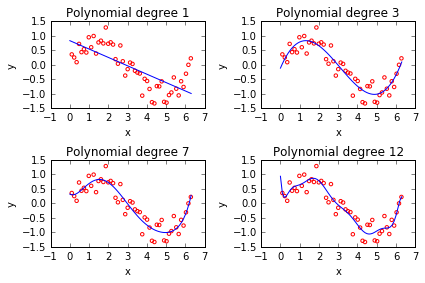

In [9]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        phi = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        w_LSE, mse = least_squares(y, phi)
        rmse = np.sqrt(2*mse)
       

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, w_LSE, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

In [73]:
ratio = 0.3
x_split = np.zeros(int(x.shape[0]*ratio))
print(len(x_split))

15


# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [10]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    
    #random indexes:
    size_train = int(x.shape[0]*ratio)
    size_test = len(x) - size_train
    order_idx = np.random.permutation(np.arange(len(x)))
    x_train = np.zeros(size_train)
    y_train = np.zeros(size_train)
    x_test = np.zeros(size_test)
    y_test = np.zeros(size_test)
    for i in range(size_train):
        x_train[i] = x[order_idx[i]]
        y_train[i] = y[order_idx[i]]
    i += 1
    for j in range(size_test):
        x_test[j] = x[order_idx[i+j]]
        y_test[j] = y[order_idx[i+j]]
        
    return x_train, y_train, x_test, y_test
        
    # ***************************************************
    raise NotImplementedError

Then, test your `split_data` function below.

In [11]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    w, mse = least_squares(y_train, phi_train)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*mse)
    e_te = compute_loss(y_test, phi_test, w)
    mse_te = np.dot(np.transpose(e_te), e_te)/(2*len(y_test))
    rmse_te = np.sqrt(2*mse_te)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.243, Testing RMSE=0.241
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.211, Testing RMSE=3.452
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.022
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.443


# Ridge Regression
Please fill in the function below.

In [12]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    tx_transposed = np.transpose(tx)
    lambda2 = lamb*2*len(y)
    txxt = np.dot(tx_transposed, tx)
    diag = lambda2*np.ones(txxt.shape[0])
    lambIm = np.diagflat(diag)
    w = np.linalg.solve(txxt+lambIm, np.dot(tx_transposed, y))
    return w
    # ***************************************************
    raise NotImplementedError

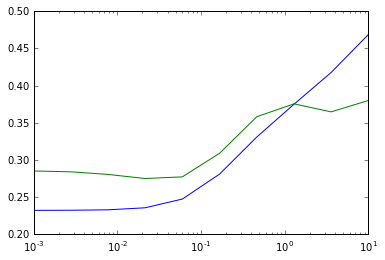

In [21]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    loss_train = []
    loss_test = []
    for idx, lamb in enumerate(lambdas):
        w = ridge_regression(y_train, phi_train, lamb)
        
        e_te = compute_loss(y_test, phi_test, w)
        mse_te = np.dot(np.transpose(e_te), e_te)/(2*len(y_test))
        rmse_te = np.sqrt(2*mse_te)
        
        e_tr = compute_loss(y_train, phi_train, w)
        mse_tr = np.dot(np.transpose(e_tr), e_tr)/(2*len(y_train))
        rmse_tr = np.sqrt(2*mse_tr)
        
        loss_train.append(rmse_tr)
        loss_test.append(rmse_te)
    
    plt.semilogx(lambdas, loss_train)
    plt.semilogx(lambdas, loss_test)
    plt.show
        

seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)